<a href="https://colab.research.google.com/github/EduardoWS/Calculo-Numerico/blob/main/Lagrange_Newton_interp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

def lagrange_interpolation(x, y, xi):
    """
    Realiza a interpolação de Lagrange para encontrar o valor interpolado em xi.

    Argumentos:
    x -- uma lista de pontos x conhecidos
    y -- uma lista de pontos y conhecidos correspondentes a x
    xi -- o valor x para o qual queremos encontrar o valor interpolado

    Retorna:
    yi -- o valor interpolado correspondente a xi
    """
    n = len(x)
    yi = 0.0

    for i in range(n):
        # Calcula o valor do polinômio de Lagrange para o ponto xi
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (xi - x[j]) / (x[i] - x[j])
        yi += term

    return yi

In [8]:
x = [-2, 0, 3, 5]
y = [3, -2, 4, 2]
xi = 0

yi = lagrange_interpolation(x, y, xi)
print("Valor interpolado em xi =", yi)

Valor interpolado em xi = -2.0


In [9]:
def divided_differences(x, y):
    """
    Calcula as diferenças divididas para a interpolação de Newton.

    Argumentos:
    x -- uma lista de pontos x conhecidos
    y -- uma lista de pontos y conhecidos correspondentes a x

    Retorna:
    tabela -- uma tabela de diferenças divididas
    """
    n = len(x)
    tabela = [[0] * n for _ in range(n)]
    tabela[0] = y

    for j in range(1, n):
        for i in range(n - j):
            tabela[j][i] = (tabela[j - 1][i + 1] - tabela[j - 1][i]) / (x[i + j] - x[i])

    return tabela


def newton_interpolation(x, y, xi):
    """
    Realiza a interpolação de Newton para encontrar o valor interpolado em xi.

    Argumentos:
    x -- uma lista de pontos x conhecidos
    y -- uma lista de pontos y conhecidos correspondentes a x
    xi -- o valor x para o qual queremos encontrar o valor interpolado

    Retorna:
    yi -- o valor interpolado correspondente a xi
    """
    n = len(x)
    tabela = divided_differences(x, y)
    yi = tabela[0][0]

    for i in range(1, n):
        term = tabela[i][0]
        for j in range(i):
            term *= (xi - x[j])
        yi += term

    return yi

In [21]:
x = [-2, 0, 3, 5]
y = [3, -2, 4, 2]

xi = 5

yi = newton_interpolation(x, y, xi)
print("Valor interpolado em xi =", yi)

Valor interpolado em xi = 2.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_interpolation(x, y, xi, yi):
    """
    Plota o gráfico da interpolação.

    Argumentos:
    x -- uma lista de pontos x conhecidos
    y -- uma lista de pontos y conhecidos correspondentes a x
    xi -- o valor x interpolado
    yi -- o valor interpolado correspondente a xi
    """
    plt.plot(x, y, 'o', label='Pontos conhecidos')
    plt.plot(xi, yi, 'ro', label='Ponto interpolado')

    # Cria um array de valores x para traçar a linha do polinômio
    x_line = np.linspace(min(x), max(x), 100)

    # Calcula os valores y correspondentes para a linha do polinômio
    y_line = [newton_interpolation(x, y, xi) for xi in x_line]

    plt.plot(x_line, y_line, label='Polinômio interpolador')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolação de Newton')
    plt.legend()
    plt.grid(True)
    plt.show()

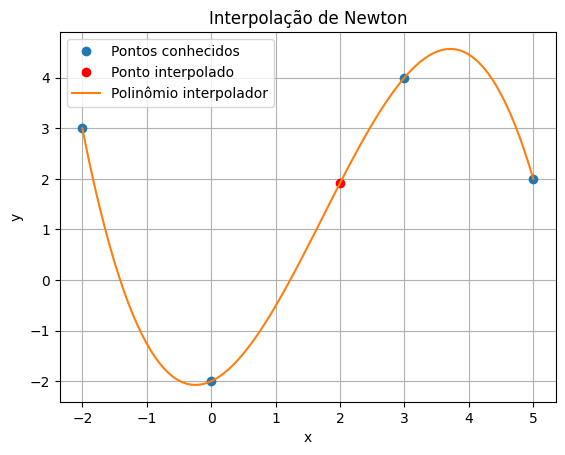

In [30]:

x = [-2, 0, 3, 5]
y = [3, -2, 4, 2]

xi = 2

yi = newton_interpolation(x, y, xi)

plot_interpolation(x, y, xi, yi)